In [72]:
import pandas as pd
from torch import Tensor

def test(x):
    if type(x).__name__ == 'str':
        return float(x[7:-1]) 
    else:
        return x

In [83]:
def get_mean(df, norm='fnorm'):
    df['fnorm'] = df['fnorm'].apply(lambda x: test(x))
    df['one_norm'] = df['one_norm'].apply(lambda x: test(x))
    if norm == 'fnorm':
        return df['fnorm'].mean()
    else:
        return df['one_norm'].mean()

In [103]:
file_conf = [
    {'file_name_member': 'forward_bn17_member.csv',
     'file_name_non_member': 'forward_bn17_non_member.csv',
    'layer_name': 'bn17'
    },
    {'file_name_member': 'forward_member.csv',
     'file_name_non_member': 'forward_non_member.csv',
    'layer_name': 'linear'
    },
    
]

In [104]:
sensitivity_list = []
for layer in file_conf:
    fnorm = abs(get_mean(pd.read_csv(layer['file_name_non_member']))- get_mean(pd.read_csv(layer['file_name_member'])))
    one_norm = abs(get_mean(pd.read_csv(layer['file_name_member']),norm='one')- get_mean(pd.read_csv(layer['file_name_member']),norm='one'))
    tmp = {'name': layer['layer_name'], 'fnorm':  fnorm, 'one_norm':one_norm}
    sensitivity_list.append(tmp)

sensitivity_df = pd.DataFrame(sensitivity_list)

In [105]:
sensitivity_df

,name,fnorm,one_norm
0,bn17,0.121007,0.0
1,linear,0.076159,0.0


<AxesSubplot:xlabel='name', ylabel='fnorm'>

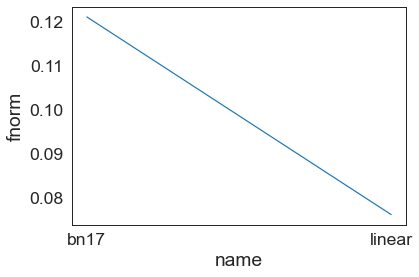

In [108]:
import seaborn as sns


sns.set_style('white')
sns.set_context("paper", font_scale = 2)


# Plot the responses for different events and regions
sns.lineplot(x="name", y="fnorm", markers=True, 
             data=sensitivity_df)